In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
C=3e8
G=6.67e-11
RSun=6.96e8
MSun=1.99e30 #mass of lens, 1e30 ~ solar mass 
Ds=10e20   #angular diameter distance from obs to source
Dds=10e20 #angular diameter distance from deflection point to source
Dd=149.6e9    #angular diameter distance from obs to deflection point
rshft=0.000
z=Dds
kappa=0.1
#beta=np.arctan(6.96e8/149.6e9)
beta=math.pi/100

In [2]:
def dAngle(xi, con):
    a=4.0*G*M/(C**2*xi)
    if con:
        a=a*180/math.pi*60*60
    return a

0.004619989196455578


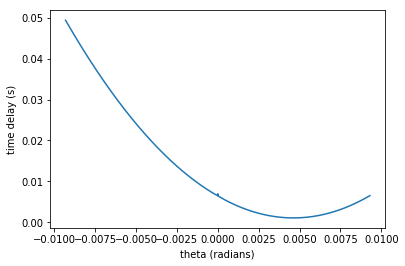

0.00107019924169 0.00462914438503
1.08014022888


In [3]:
beta=math.pi/680
print(beta)
M=MSun
theta=np.arange(-2,2,0.001)*RSun/Dd
deltaT=(Dd*Ds/(2*Dds)*(theta-math.pi/680)**2-(4*G*M/(C**2)*np.log(abs(theta)/(2*Dds))))/C
plt.plot(theta, deltaT)
plt.xlabel("theta (radians)")
plt.ylabel("time delay (s)")
plt.show()
print(np.amin(deltaT), np.amax(np.equal(np.amin(deltaT), deltaT)*theta))
print((np.amax(np.equal(np.amin(deltaT), deltaT)*theta)-math.pi/680)/dAngle(RSun,False))

#thats what i call a ~1.7 arcsecond deflection boiii
#so the equation would ordinarily be solved by beta=theta but here however the slight offset of the shapiro delay
#means that the actual solution is slightly offset so u have to subtract away the original beta angle to get the 
#difference between a normal deflection and this gravitational lensing ahhahahhahahahahaha

In [370]:
def pointSource(theta, beta, M):
    #deltaT=(Dd*Ds/(2*Dds)*(theta-math.pi/680)**2-(4*G*M/(C**2)*np.log(abs(theta)/(2*Dds))))/C
    tgeom=(Dd*Ds/(2*Dds)*(theta-beta)**2)/C
    tgrav=-((4*G*M/(C**2)*np.log(abs(theta)/(2*Dds))))/C
    t=tgrav+tgeom
    return t, tgrav, tgeom

In [434]:
def pointSolve(beta, M):
    theta=np.arange(-2,2,0.0001)*beta
    t, tgrav, tgeom = pointSource(theta, beta, M)
    tmin=np.amin(t)
    dA=180/math.pi*60*60*(np.amax(np.equal(np.amin(t), t)*theta)-beta)
    return tmin, dA

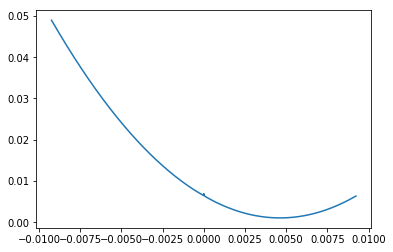

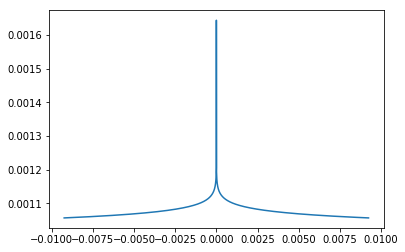

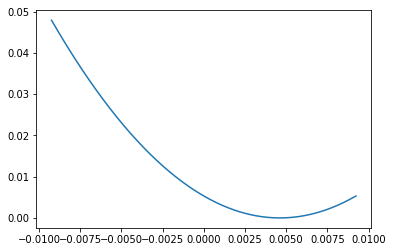

0.0010701992704 1.90588235263


In [442]:
theta=np.arange(-2,2,0.001)*math.pi/680
beta=math.pi/680
#beta=0
t, tgrav, tgeom = pointSource(theta, beta, MSun*1)
plt.plot(theta, t)
plt.show()
plt.plot(theta, tgrav)
plt.show()
plt.plot(theta, tgeom)
plt.show()

print(np.amin(t), 180/math.pi*60*60*(np.amax(np.equal(np.amin(t), t)*theta)-beta))

/Users/mawsonsammons/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


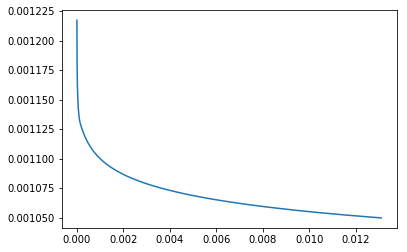

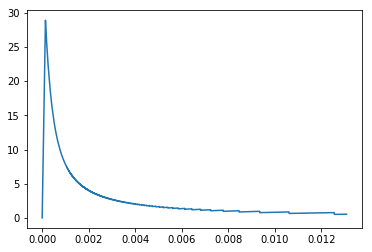

1


In [435]:
beta=np.arange(0,1,0.0001)*math.pi/240
tmin=np.zeros(len(beta))
dA=np.zeros(len(beta))
for i in range(len(beta)):
    tmin[i], dA[i]=pointSolve(beta[i], MSun)
plt.plot(beta, tmin)
plt.show()
plt.plot(beta, dA)
plt.show()

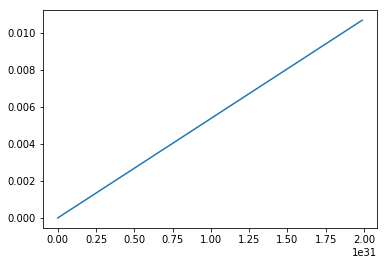

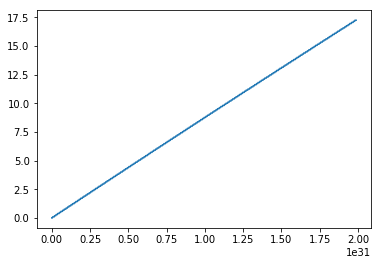

In [436]:
beta=math.pi/680
M=np.arange(1000)/100*MSun
tmin=np.zeros(len(M))
dA=np.zeros(len(M))
for i in range(len(M)):
    tmin[i], dA[i]=pointSolve(beta, M[i])
plt.plot(M, tmin)
plt.show()
plt.plot(M, dA)
plt.show()